In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [1]:
## Ekspolarasi data yang akan di teliti

In [57]:
ls


NJ9.F.csv  pertamina_moving_avarange.pdf  Untitled.ipynb


In [58]:
df = pd.read_csv("NJ9.F.csv")

In [59]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-13,0.0772,0.0772,0.0772,0.0772,-52.236629,0
1,2023-10-16,0.0729,0.0729,0.0729,0.0729,-49.327072,0
2,2023-10-17,0.0887,0.0887,0.0887,0.0887,-60.017990,3000
3,2023-10-18,0.0828,0.0828,0.0828,0.0828,-56.025814,0
4,2023-10-19,0.0802,0.0802,0.0802,0.0802,-54.266548,0
...,...,...,...,...,...,...,...
213,2024-08-15,0.0680,0.0680,0.0680,0.0680,0.068000,0
214,2024-08-16,0.0680,0.0680,0.0675,0.0675,0.067500,0
215,2024-08-19,0.0670,0.0675,0.0670,0.0675,0.067500,0
216,2024-08-20,0.0670,0.0670,0.0670,0.0670,0.067000,0


In [60]:
df1 = df['Open']

In [61]:
df1.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
213    False
214    False
215    False
216    False
217    False
Name: Open, Length: 218, dtype: bool

In [62]:
arr = df['Close']
window_size = 3
 
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
 
# Loop through the array to consider
# every window of size 3
while i < len(arr) - window_size + 1:
   
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
 
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
     
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
     
    # Shift window to right by one position
    i += 1
 
print(moving_averages)

[0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.0

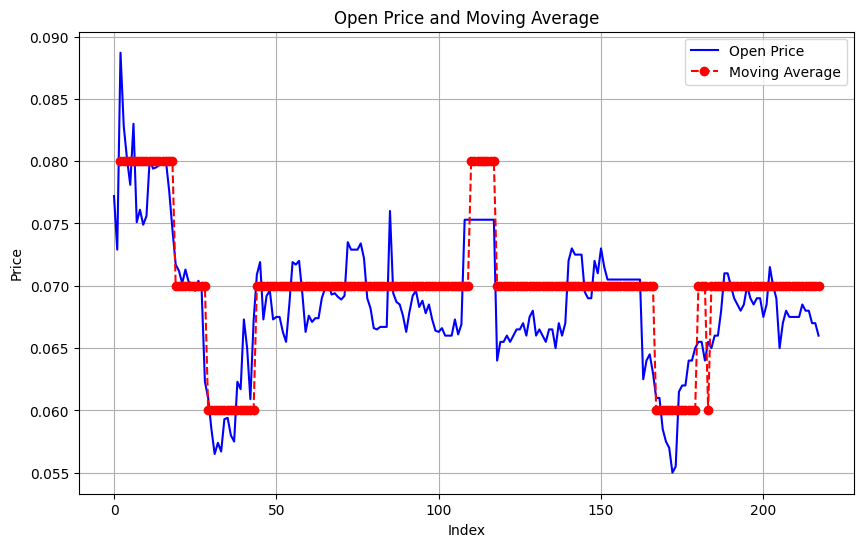

In [64]:
# Buat DataFrame untuk moving averages agar lebih mudah diproses
ma_df = pd.DataFrame(moving_averages, columns=['Moving Average'])

# Plot data asli dan moving average
plt.figure(figsize=(10, 6))

# Plot data asli
plt.plot(df.index, df['Open'], label='Open Price', linestyle='-', color='b')

# Plot moving average
plt.plot(range(window_size-1, len(df)), moving_averages, label='Moving Average', marker='o', linestyle='--', color='r')

# Tambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Open Price and Moving Average')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

In [65]:
# Data Aktual
actual = df['Close']

# Data Peramalan
forecast = moving_averages

# Hitung Absolute Percentage Error (APE) dan MAPE
ape = [abs((f - a) / a) * 100 for f, a in zip(forecast, actual)]
mape = sum(ape) / len(ape)

print(f"MAPE: {mape:.2f}%")

MAPE: 3.91%


In [66]:
# Hitung Absolute Percentage Error (APE) untuk setiap titik data
ape = [abs((f - a) / a) * 100 for f, a in zip(forecast, actual)]

# Tampilkan APE satu per satu
for i, error in enumerate(ape):
    print(f"APE untuk titik data ke-{i+1}: {error:.2f}%")

# Hitung MAPE
mape = sum(ape) / len(ape)
print(f"MAPE: {mape:.2f}%")

APE untuk titik data ke-1: 3.63%
APE untuk titik data ke-2: 9.74%
APE untuk titik data ke-3: 9.81%
APE untuk titik data ke-4: 3.38%
APE untuk titik data ke-5: 0.25%
APE untuk titik data ke-6: 2.43%
APE untuk titik data ke-7: 3.61%
APE untuk titik data ke-8: 6.52%
APE untuk titik data ke-9: 5.12%
APE untuk titik data ke-10: 6.81%
APE untuk titik data ke-11: 5.82%
APE untuk titik data ke-12: 0.25%
APE untuk titik data ke-13: 0.76%
APE untuk titik data ke-14: 0.63%
APE untuk titik data ke-15: 0.38%
APE untuk titik data ke-16: 0.25%
APE untuk titik data ke-17: 0.00%
APE untuk titik data ke-18: 9.79%
APE untuk titik data ke-19: 6.04%
APE untuk titik data ke-20: 2.37%
APE untuk titik data ke-21: 1.69%
APE untuk titik data ke-22: 0.28%
APE untuk titik data ke-23: 1.82%
APE untuk titik data ke-24: 0.43%
APE untuk titik data ke-25: 0.28%
APE untuk titik data ke-26: 0.57%
APE untuk titik data ke-27: 0.57%
APE untuk titik data ke-28: 13.79%
APE untuk titik data ke-29: 3.69%
APE untuk titik data k

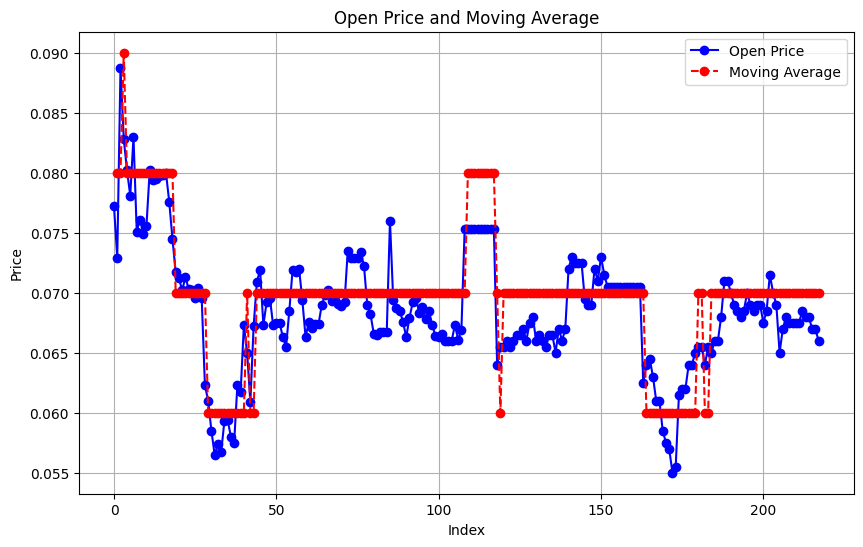

In [22]:
# Buat DataFrame untuk moving averages agar lebih mudah diproses
ma_df = pd.DataFrame(moving_averages, columns=['Moving Average'])

# Plot data asli dan moving average
plt.figure(figsize=(10, 6))

# Plot data asli
plt.plot(df.index, df['Open'], label='Open Price', marker='o', linestyle='-', color='b')

# Plot moving average
plt.plot(range(window_size-1, len(df)), moving_averages, label='Moving Average', marker='o', linestyle='--', color='r')

# Tambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Open Price and Moving Average')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

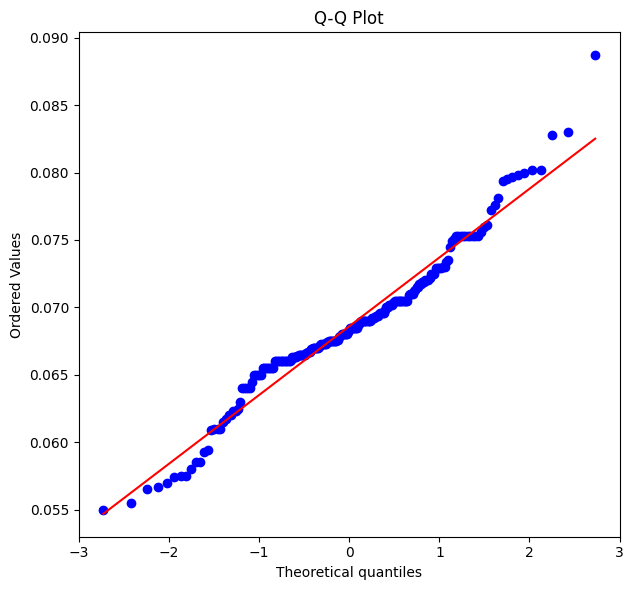

In [18]:
# Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
stats.probplot(df['Open'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [42]:
# Parameter
window_size = 6
arr = df['Close']

# Hitung moving average
i = 0
moving_averages = []
while i < len(arr) - window_size + 1:
    window = arr[i : i + window_size]
    window_average = round(sum(window) / window_size, 2)
    moving_averages.append(window_average)
    i += 1

# Menambahkan NaN untuk ukuran yang berbeda
moving_averages = [np.nan] * (window_size - 1) + moving_averages

# Menyiapkan DataFrame untuk tabel MAPE
results = pd.DataFrame({
    'Index': df.index,
    'Actual': df['Open'],
    'Moving Average': moving_averages
})

# Menghitung MAPE pada setiap langkah
def calculate_mape(actual, forecast):
    return np.abs((actual - forecast) / actual) * 100

# Menghitung MAPE untuk setiap titik data dengan moving average yang ada
results['MAPE'] = np.nan
results.loc[window_size-1:, 'MAPE'] = calculate_mape(
    df['Open'][window_size-1:],
    moving_averages[window_size-1:]
)

# Menghitung MAPE keseluruhan
def overall_mape(actual, forecast):
    # Hanya mempertimbangkan nilai yang valid (tidak NaN)
    valid_actual = actual[window_size-1:]
    valid_forecast = forecast[window_size-1:]
    return np.mean(calculate_mape(valid_actual, valid_forecast))

# Hitung dan tampilkan MAPE keseluruhan
mape_total = overall_mape(df['Open'], moving_averages)
print(f'MAPE Keseluruhan: {mape_total:.2f}%')

# Menampilkan tabel MAPE
print(results)

MAPE Keseluruhan: 4.13%
     Index  Actual  Moving Average      MAPE
0        0  0.0772             NaN       NaN
1        1  0.0729             NaN       NaN
2        2  0.0887             NaN       NaN
3        3  0.0828             NaN       NaN
4        4  0.0802             NaN       NaN
..     ...     ...             ...       ...
213    213  0.0680            0.07  2.941176
214    214  0.0680            0.07  2.941176
215    215  0.0670            0.07  4.477612
216    216  0.0670            0.07  4.477612
217    217  0.0660            0.07  6.060606

[218 rows x 4 columns]


## maka dapat disimpulkan hasil dari forecasting moving avarange pada data saham pertamina telah menunjukan hasil yang sangat baik dimana mape yang di dapatkan yaitu sebesar 4.13% dengan rataan  bergerak dihitung dengan menggunakan 6 data poin terakhir.